In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PyOD (Python Outlier Detection) is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data. It provides access to a wide range of outlier detection algorithms, including both classical methods and more recent ones.

In [17]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/Sample_scores.csv')

# Display the first few rows of the dataframe
print(data.head())

   Overs  Scores
0      1      15
1      2      10
2      3      17
3      4      10
4      5      12


In [9]:
!pip install pyod

In [18]:
from pyod.models.knn import KNN

# Using only the 'Scores' column for anomaly detection
X = data[['Scores']].values

# Initialize the KNN model
knn_clf = KNN()

# Fit the model
knn_clf.fit(X)

# Get the anomaly scores and predictions
knn_scores = knn_clf.decision_scores_
knn_predictions = knn_clf.labels_

# Add the scores and predictions to your dataframe
data['knn_anomaly_score'] = knn_scores
data['knn_is_anomaly'] = knn_predictions

# Display the data with KNN anomaly scores and labels
print(data)

    Overs  Scores  knn_anomaly_score  knn_is_anomaly
0       1      15                3.0               0
1       2      10                2.0               0
2       3      17                4.0               0
3       4      10                2.0               0
4       5      12                2.0               0
5       6      20                6.0               0
6       7      34               17.0               1
7       8       7                4.0               0
8       9       8                3.0               0
9      10      11                1.0               0
10     11      27               10.0               0
11     12      14                3.0               0
12     13       3                7.0               0
13     14      10                2.0               0
14     15      11                1.0               0
15     16      13                2.0               0
16     17     100               80.0               1
17     18      16                4.0          

The KNN anomaly detection has effectively identified the most extreme score (100) as an anomaly, which aligns with expectations. It also flagged a moderately high score (34), indicating its sensitivity to variations in the dataset.

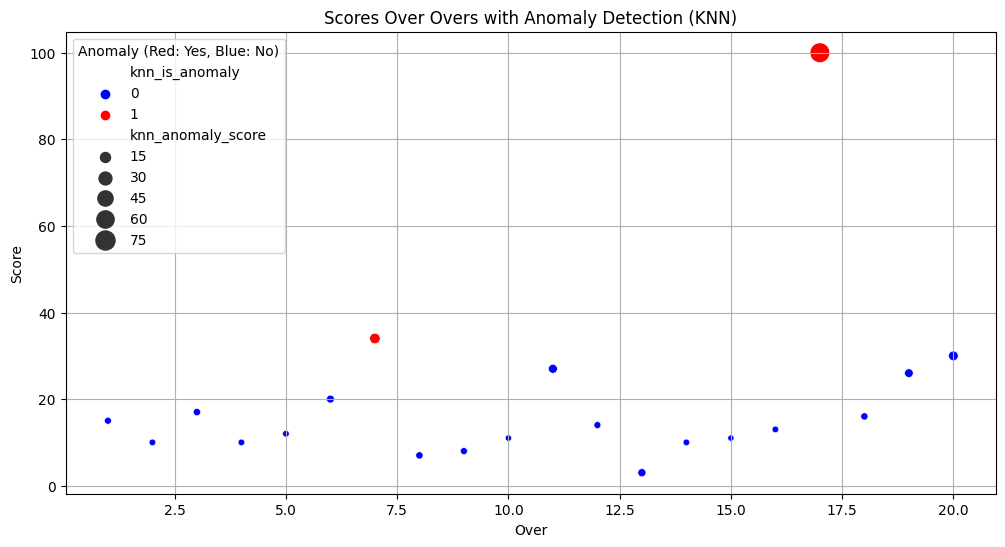

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame from the provided data for visualization
data = pd.DataFrame({
    'Overs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Scores': [15, 10, 17, 10, 12, 20, 34, 7, 8, 11, 27, 14, 3, 10, 11, 13, 100, 16, 26, 30],
    'knn_anomaly_score': [3.0, 2.0, 4.0, 2.0, 2.0, 6.0, 17.0, 4.0, 3.0, 1.0, 10.0, 3.0, 7.0, 2.0, 1.0, 2.0, 80.0, 4.0, 9.0, 13.0],
    'knn_is_anomaly': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
})

# Plotting Scores over Overs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Overs', y='Scores', hue='knn_is_anomaly', size='knn_anomaly_score', sizes=(20, 200), palette=['blue','red'], data=data)
plt.title('Scores Over Overs with Anomaly Detection (KNN)')
plt.xlabel('Over')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Anomaly (Red: Yes, Blue: No)', loc='upper left')
plt.show()